#   CLICK THROUGH RATE

###  Explanation for Using the Kaggle Dataset
When working with the dataset you provided, I encountered significant challenges with class imbalance. Specifically, the is_clicked feature was highly imbalanced, with almost all rows labeled as 1. This imbalance posed a substantial problem for model training and evaluation, as it could lead to biased models that fail to generalize well to unseen data.

In [1]:
# import necessary libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
# check the dataset

%%bigquery

SELECT *
FROM my_dataset.ctr_train
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,206478,2017-07-05 08:35:00+00:00,433096,I,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
1,220891,2017-07-05 09:31:00+00:00,433096,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
2,220995,2017-07-05 11:36:00+00:00,914312,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,1,0
3,220888,2017-07-05 15:13:00+00:00,433096,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
4,206480,2017-07-05 17:27:00+00:00,433096,I,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
5,206477,2017-07-05 19:51:00+00:00,433096,I,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
6,221112,2017-07-05 20:05:00+00:00,815221,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,1,0
7,580926,2017-07-06 00:28:00+00:00,671549,H,118601,28529,5,82527.0,NaN,None,NaN,NaN,NaN,1,0
8,584051,2017-07-06 01:21:00+00:00,249530,H,118601,28529,5,82527.0,NaN,None,NaN,NaN,NaN,0,0
9,595111,2017-07-06 04:42:00+00:00,954023,B,118601,28529,3,82527.0,NaN,None,NaN,NaN,NaN,0,0


In [3]:
# import necessary libraries
# connect google colab with BigQuery
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client()


In [4]:
from google.cloud import bigquery
import pandas as pd

# Authenticate and set up BigQuery client
client = bigquery.Client()

# Define the project ID
project_id = 'midproject-429319'

# Define the SQL query to filter data in BigQuery
query = """
SELECT *
FROM `my_dataset.ctr_train`;

"""
#selected 10 days
# Load the filtered data into a Pandas DataFrame
ctr_df = client.query(query).to_dataframe()

In [5]:
# check the dataframe

ctr_df

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,206478,2017-07-05 08:35:00+00:00,433096,I,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
1,220891,2017-07-05 09:31:00+00:00,433096,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
2,220995,2017-07-05 11:36:00+00:00,914312,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,1,0
3,220888,2017-07-05 15:13:00+00:00,433096,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
4,206480,2017-07-05 17:27:00+00:00,433096,I,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,52038,2017-07-07 23:19:00+00:00,516943,C,405490,60305,3,NaN,1.0,Male,1.0,3.0,NaN,0,1
463287,99930,2017-07-07 23:27:00+00:00,301786,C,405490,60305,3,NaN,1.0,Male,1.0,3.0,2.0,0,0
463288,50957,2017-07-07 23:38:00+00:00,710387,C,405490,60305,3,NaN,1.0,Male,1.0,3.0,2.0,1,0
463289,517210,2017-07-07 23:41:00+00:00,461118,A,405490,60305,2,NaN,1.0,Male,1.0,3.0,4.0,1,0


### EXPLORE DATASET

In [6]:
ctr_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,206478,2017-07-05 08:35:00+00:00,433096,I,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
1,220891,2017-07-05 09:31:00+00:00,433096,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
2,220995,2017-07-05 11:36:00+00:00,914312,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,1,0
3,220888,2017-07-05 15:13:00+00:00,433096,A,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0
4,206480,2017-07-05 17:27:00+00:00,433096,I,118601,28529,4,82527.0,NaN,None,NaN,NaN,NaN,0,0


In [7]:
ctr_df.shape # check the number of rows and columns

(463291, 15)

#   PREPROCESSING DATA

### Table Info

In [ ]:
# create a table that gives info about columns and the number of null values of them

# Create a DataFrame for column types
column_types = pd.DataFrame(ctr_df.dtypes).T.rename(index={0: 'column type'})

# Create a DataFrame for the number of null values
null_values_count = pd.DataFrame(ctr_df.isnull().sum()).T.rename(index={0: 'null values (nb)'})

# Create a DataFrame for the percentage of null values
null_values_pct = pd.DataFrame(ctr_df.isnull().sum() / ctr_df.shape[0] * 100).T.rename(index={0: 'null values (%)'})

# Concatenate the DataFrames
table_info = pd.concat([column_types, null_values_count, null_values_pct])

# Display the table_info DataFrame
table_info


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
column type,Int64,"datetime64[us, UTC]",Int64,object,Int64,Int64,Int64,float64,float64,object,float64,float64,float64,Int64,Int64
null values (nb),0,0,0,0,0,0,0,365854,18243,18243,18243,18243,125129,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.96851,3.937698,3.937698,3.937698,3.937698,27.008727,0.0,0.0


In [ ]:
# drop table product_category_2 because 78% is null values


ctr_df.drop(labels='product_category_2', axis=1, inplace=True)

### Check how many 1 in is_click column.

In [ ]:
sum(ctr_df['is_click']==1)

31331

# 2. DATA CLEANING

### Handle Missing Values

In [ ]:
# check missing values (info about all columns)

ctr_df.isna().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [ ]:
# fill the city_development_index column with random numbers to avoid any interruption during process


# Check how many missing values are in 'city_development_index' column
num_missing = ctr_df['city_development_index'].isnull().sum()

if num_missing > 0:
    # Get the indices of missing values
    missing_indices = ctr_df['city_development_index'].isnull()

    # Generate random numbers to replace missing values
    replace_values = np.random.choice([1, 2, 3, 4], size=num_missing, p=[0.25, 0.25, 0.25, 0.25])

    # Fill the missing values with random numbers using .loc to avoid SettingWithCopyWarning
    ctr_df.loc[missing_indices, 'city_development_index'] = replace_values

# Verify the DataFrame
ctr_df['city_development_index']


0         2.0
1         2.0
2         1.0
3         4.0
4         3.0
         ... 
463286    1.0
463287    2.0
463288    2.0
463289    4.0
463290    4.0
Name: city_development_index, Length: 463291, dtype: float64

In [ ]:
# drop other missing values


ctr_df= ctr_df.dropna()

In [ ]:
# check missing values one more time

ctr_df.isna().sum()

session_id                0
DateTime                  0
user_id                   0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

In [ ]:
# check data types of columns

ctr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445048 entries, 18243 to 463290
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   session_id              445048 non-null  Int64              
 1   DateTime                445048 non-null  datetime64[us, UTC]
 2   user_id                 445048 non-null  Int64              
 3   product                 445048 non-null  object             
 4   campaign_id             445048 non-null  Int64              
 5   webpage_id              445048 non-null  Int64              
 6   product_category_1      445048 non-null  Int64              
 7   user_group_id           445048 non-null  float64            
 8   gender                  445048 non-null  object             
 9   age_level               445048 non-null  float64            
 10  user_depth              445048 non-null  float64            
 11  city_development_index  445

In [ ]:
# Convert 'DateTime' to datetime format
ctr_df.loc[:, 'DateTime'] = pd.to_datetime(ctr_df['DateTime'])

# Extract the hour from the 'DateTime' column
ctr_df.loc[:, 'DateTime'] = ctr_df['DateTime'].dt.hour

ctr_df

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
18243,391562,16,821098,D,118601,28529,4,0.0,Male,0.0,3.0,3.0,0,0
18244,235023,16,821098,I,118601,28529,4,0.0,Male,0.0,3.0,3.0,0,0
18245,218082,16,821098,I,118601,28529,4,0.0,Male,0.0,3.0,3.0,0,0
18246,594145,4,1004108,I,118601,28529,4,0.0,Male,0.0,3.0,4.0,1,0
18247,230688,7,181303,G,118601,28529,4,0.0,Male,0.0,3.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,52038,23,516943,C,405490,60305,3,1.0,Male,1.0,3.0,1.0,0,1
463287,99930,23,301786,C,405490,60305,3,1.0,Male,1.0,3.0,2.0,0,0
463288,50957,23,710387,C,405490,60305,3,1.0,Male,1.0,3.0,2.0,1,0
463289,517210,23,461118,A,405490,60305,2,1.0,Male,1.0,3.0,4.0,1,0


In [ ]:
# check the columns in the correct format

ctr_df.nunique()

session_id                445048
DateTime                      24
user_id                   143837
product                       10
campaign_id                   10
webpage_id                     9
product_category_1             5
user_group_id                 13
gender                         2
age_level                      7
user_depth                     3
city_development_index         4
var_1                          2
is_click                       2
dtype: int64

#  Exploratory Data Analysis

Convert categorical text data into numerical labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
LE = LabelEncoder()

# Use .loc to modify the DataFrame in place and avoid the warning
ctr_df.loc[:, 'gender'] = LE.fit_transform(ctr_df['gender'])
ctr_df.loc[:, 'product'] = LE.fit_transform(ctr_df['product'])

# Verify the DataFrame
ctr_df

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
18243,391562,16,821098,3,118601,28529,4,0.0,1,0.0,3.0,3.0,0,0
18244,235023,16,821098,8,118601,28529,4,0.0,1,0.0,3.0,3.0,0,0
18245,218082,16,821098,8,118601,28529,4,0.0,1,0.0,3.0,3.0,0,0
18246,594145,4,1004108,8,118601,28529,4,0.0,1,0.0,3.0,4.0,1,0
18247,230688,7,181303,6,118601,28529,4,0.0,1,0.0,3.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,52038,23,516943,2,405490,60305,3,1.0,1,1.0,3.0,1.0,0,1
463287,99930,23,301786,2,405490,60305,3,1.0,1,1.0,3.0,2.0,0,0
463288,50957,23,710387,2,405490,60305,3,1.0,1,1.0,3.0,2.0,1,0
463289,517210,23,461118,0,405490,60305,2,1.0,1,1.0,3.0,4.0,1,0


In [ ]:
# check the clicked or not cliked

print("not clicked：", ctr_df.loc[ctr_df['is_click']==0].shape[0])
print("clicked：", ctr_df.loc[ctr_df['is_click']==1].shape[0])

not clicked： 414991
clicked： 30057


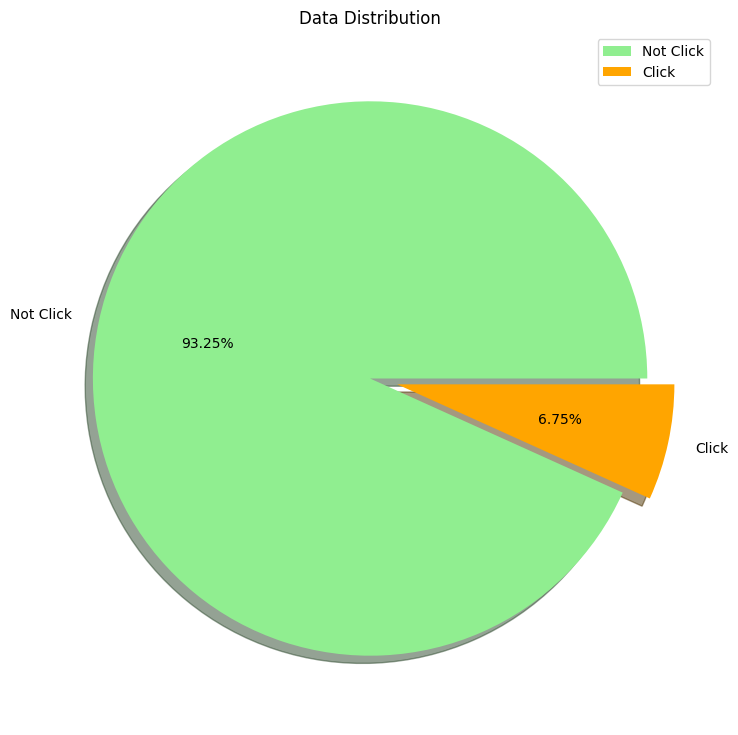

In [ ]:
# check the distribution
# check it  visually

labels = ['Not Click', 'Click']
size = ctr_df['is_click'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]
plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.axis('off')
plt.title("Data Distribution")
plt.legend()
plt.show()

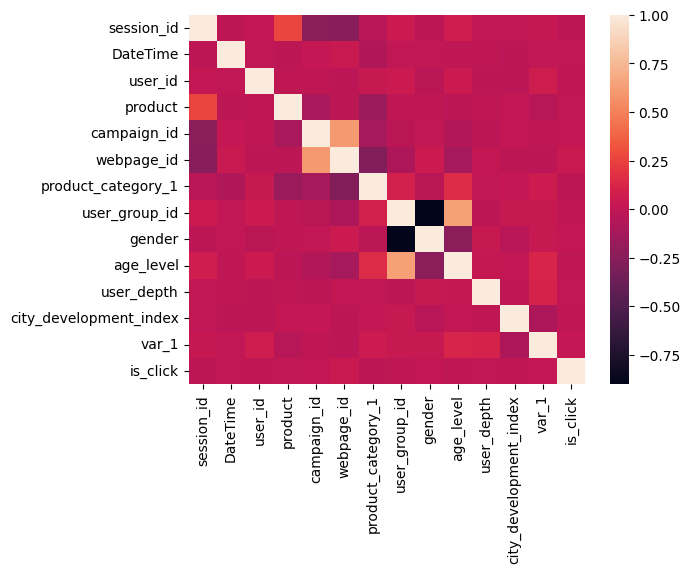

In [ ]:
sns.heatmap(ctr_df.corr())
plt.show()

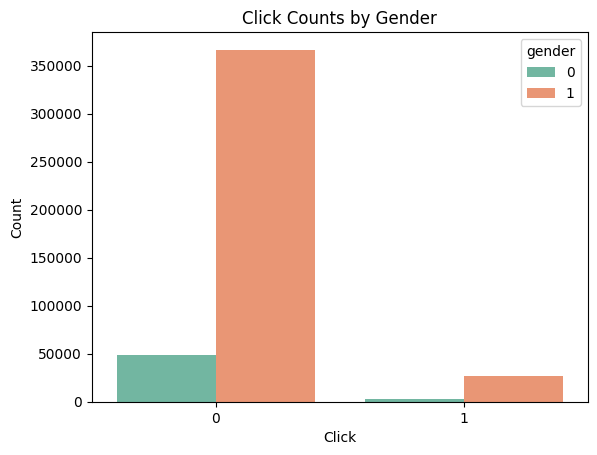

In [ ]:
sns.countplot(x='is_click', hue='gender',
              data=ctr_df,
              palette='Set2')

# set the plot title and axis labels
plt.title('Click Counts by Gender')
plt.xlabel('Click')
plt.ylabel('Count')
plt.show()

<ipython-input-33-ce3dc120daa2>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='DateTime', y='is_click', data=Is_clicked_hour, palette='Set2')


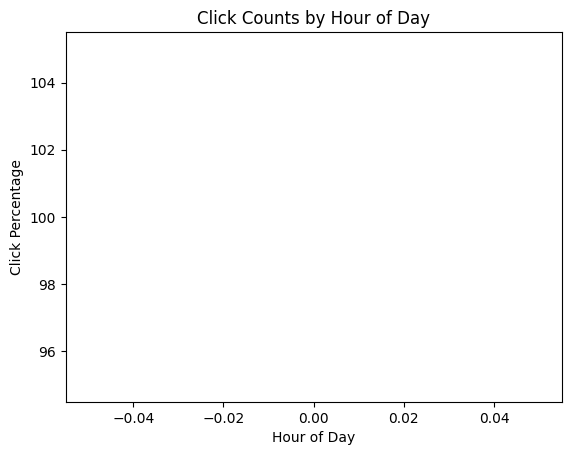

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Convert 'DateTime' to datetime and extract hour
ctr_df.loc[:, 'DateTime'] = pd.to_datetime(ctr_df['DateTime']).dt.hour

# Filter clicks
Is_clicked = ctr_df[ctr_df['is_click'] == 1]

# Group by 'DateTime' hour and calculate the sum of clicks
Is_clicked_hour = Is_clicked.groupby('DateTime').agg('sum').reset_index()

# Calculate the percentage of clicks
Is_clicked_hour['is_click'] = 100 * Is_clicked_hour['is_click'] / Is_clicked_hour['is_click'].sum()

# Plot the data
sns.lineplot(x='DateTime', y='is_click', data=Is_clicked_hour, palette='Set2')

plt.title('Click Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Click Percentage')

plt.show()


<ipython-input-34-4dbeba1650fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product',data=ctr_df[ctr_df['is_click'] == 1], palette='Set2')


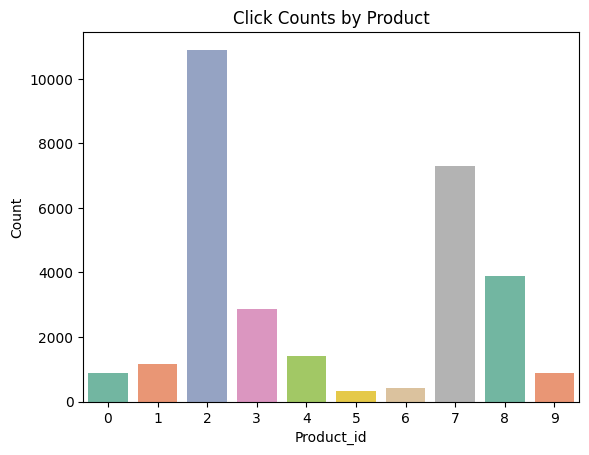

In [ ]:
# clicks distribution by product category


sns.countplot(x='product',data=ctr_df[ctr_df['is_click'] == 1], palette='Set2')

plt.title('Click Counts by Product')
plt.xlabel('Product_id')
plt.ylabel('Count')

plt.show()

<ipython-input-35-277c3ee302bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='campaign_id',data=ctr_df[ctr_df['is_click'] == 1], palette='Set2')


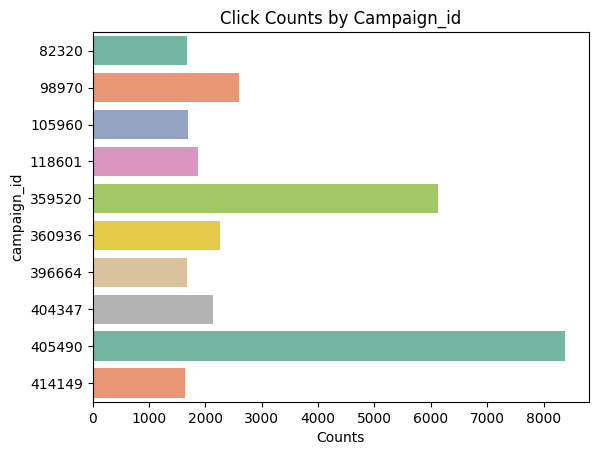

In [ ]:
# clicks distribution by campaign_id

sns.countplot(y='campaign_id',data=ctr_df[ctr_df['is_click'] == 1], palette='Set2')

plt.title('Click Counts by Campaign_id')
plt.xlabel('Counts')
plt.ylabel('campaign_id')

plt.show()


##  4. Compare Clicked vs No Clicked:

In [ ]:
ctr_df['is_click'].value_counts() # imbalanced data

is_click
0    414991
1     30057
Name: count, dtype: Int64

##  3. Transformation, New Feature, Feature Selection, and Feature Normalization:

Data inspection


In [ ]:


# Inspect data types of the columns
print(ctr_df.dtypes)

# Check for any non-integer values in the columns
for column in integer_columns:
    print(f"Column: {column}")
    print(ctr_df[column].unique())


session_id                  Int64
DateTime                    int32
user_id                     Int64
product                    object
campaign_id                 Int64
webpage_id                  Int64
product_category_1          Int64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       Int64
is_click                    Int64
dtype: object
Column: session_id
<IntegerArray>
[391562, 235023, 218082, 594145, 230688, 232479, 592074, 546630, 477319,
 485319,
 ...
  74576,  81820,  72192, 519197,  42286,  52038,  99930,  50957, 517210,
  60659]
Length: 445048, dtype: Int64
Column: user_id
<IntegerArray>
[ 821098, 1004108,  181303,  231865,  354996,   16422,  608273,  634864,
   43244,  152641,
 ...
  229715,  901238,  574861,  634993,  542193,  450308,  214298,  902008,
  945878,  928218]
Length: 143837, dtype: Int64
Column: campaign_id
<IntegerA

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [22]:
#
# Convert 'DateTime' to datetime and extract hour
ctr_df['DateTime'] = pd.to_datetime(ctr_df['DateTime']).dt.hour

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['product', 'gender', 'var_1']

for column in categorical_columns:
    le = LabelEncoder()
    ctr_df[column] = le.fit_transform(ctr_df[column])
    label_encoders[column] = le

# Ensure integer columns are properly cast
integer_columns = ['session_id', 'user_id', 'campaign_id', 'webpage_id', 'product_category_1', 'user_group_id', 'age_level', 'user_depth']

# Fill NaNs with 0 or another appropriate value and round float columns before conversion
for column in integer_columns:
    if ctr_df[column].dtype == 'float64':
        ctr_df[column] = ctr_df[column].fillna(0).round().astype(int)
    else:
        ctr_df[column] = ctr_df[column].fillna(0).astype(int)

# Initial Sampling
ctr_df_sampled = ctr_df.groupby('is_click').apply(lambda x: x.sample(n=7000 if x.name == 1 else 20000)).reset_index(drop=True)
print(ctr_df_sampled['is_click'].value_counts())

# Define features and target
X_sampled = ctr_df_sampled.drop(['is_click', 'session_id'], axis=1)
y_sampled = ctr_df_sampled['is_click']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_sampled_imputed = imputer.fit_transform(X_sampled)

# Scale the features
scaler = StandardScaler()
X_sampled_scaled = scaler.fit_transform(X_sampled_imputed)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled_scaled, y_sampled, test_size=0.3, shuffle=True, random_state=42)

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Display the resampled data counts
print('After resampling:')
print('Clicked:', sum(y_train_resampled == 1))
print('Not clicked:', sum(y_train_resampled == 0))

is_click
0    20000
1     7000
Name: count, dtype: Int64
After resampling:
Clicked: 13992
Not clicked: 13992


##  5. Baseline Models and Model Selection:

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from collections import Counter

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [25]:
# intialize models

classifiers = {

    'LogisticRegression':LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'RFC':RandomForestClassifier(),
    'Bagging':BaggingClassifier(),
    'SGD':SGDClassifier(),
    'GBC':GradientBoostingClassifier(),
    'xgb':XGBClassifier()
}

In [34]:
def accuracy_score(X_train, y_train):
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=5)
        print("Classifier Name : ", classifier.__class__.__name__,"  Training Score ：", round(training_score.mean(), 2)*100,'%')


In [35]:
# check the accureacy score
accuracy_score(X_train_resampled, y_train_resampled)

Classifier Name :  LogisticRegression   Training Score ： 54.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 67.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 68.0 %
Classifier Name :  RandomForestClassifier   Training Score ： 74.0 %
Classifier Name :  BaggingClassifier   Training Score ： 72.0 %
Classifier Name :  SGDClassifier   Training Score ： 54.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 71.0 %
Classifier Name :  XGBClassifier   Training Score ： 71.0 %


## 6. Model Validation (using GridSearchCV / K-fold)



*   Use cross-validation to assess the performance of each model.
*   Use GridSearchCV for hyperparameter tuning to find the best model parameters.



In [36]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for hyperparameter tuning
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'DT': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'RFC': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Bagging': {
        'n_estimators': [10, 20, 50]
    },
    'SGD': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l2', 'l1', 'elasticnet']
    },
    'GBC': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'xgb': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }
}

# Perform GridSearchCV for each classifier
best_estimators = {}
for name, classifier in classifiers.items():
    param_grid = param_grids.get(name, {})
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}")

# Store the best classifier
best_classifier_name = max(best_estimators, key=lambda k: best_estimators[k].score(X_train_resampled, y_train_resampled))
best_classifier = best_estimators[best_classifier_name]


Best parameters for LogisticRegression: {'C': 0.01, 'penalty': 'l2'}
Best cross-validation score for LogisticRegression: 0.5445
Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for KNN: 0.7066
Best parameters for DT: {'max_depth': 30, 'min_samples_split': 5}
Best cross-validation score for DT: 0.6808
Best parameters for RFC: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score for RFC: 0.7565
Best parameters for Bagging: {'n_estimators': 50}
Best cross-validation score for Bagging: 0.7299
Best parameters for SGD: {'alpha': 0.001, 'penalty': 'l2'}
Best cross-validation score for SGD: 0.5465
Best parameters for GBC: {'learning_rate': 0.2, 'n_estimators': 200}
Best cross-validation score for GBC: 0.7228
Best parameters for xgb: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
Best cross-validation score for xgb: 0.7263


In [37]:
# best_classifier

best_classifier

KNeighborsClassifier(n_neighbors=3, weights='distance')

#    7. Model Evaluation:

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluate the best classifier on the test set
best_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = best_classifier.predict(X_test)

# Print evaluation metrics
print(f"Evaluation metrics for {best_classifier_name}:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")



Evaluation metrics for KNN:
Accuracy: 0.5891
Precision: 0.2805
Recall: 0.3776
F1 Score: 0.3219
ROC AUC Score: 0.5202
Confusion Matrix:
[[3982 2026]
 [1302  790]]


# Prediction on test data

In [40]:
y_pred = best_classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

#  Evaluate the Best Classifier on the Test Set:

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Evaluate the best classifier on the test set
best_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = best_classifier.predict(X_test)

# Print evaluation metrics
print(f"Evaluation metrics for {best_classifier_name}:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluation metrics for KNN:
Accuracy: 0.5891
Precision: 0.2805
Recall: 0.3776
F1 Score: 0.3219
ROC AUC Score: 0.5202
Confusion Matrix:
[[3982 2026]
 [1302  790]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.71      6008
         1.0       0.28      0.38      0.32      2092

    accuracy                           0.59      8100
   macro avg       0.52      0.52      0.51      8100
weighted avg       0.63      0.59      0.61      8100



# Confusion Matrix -- Visual

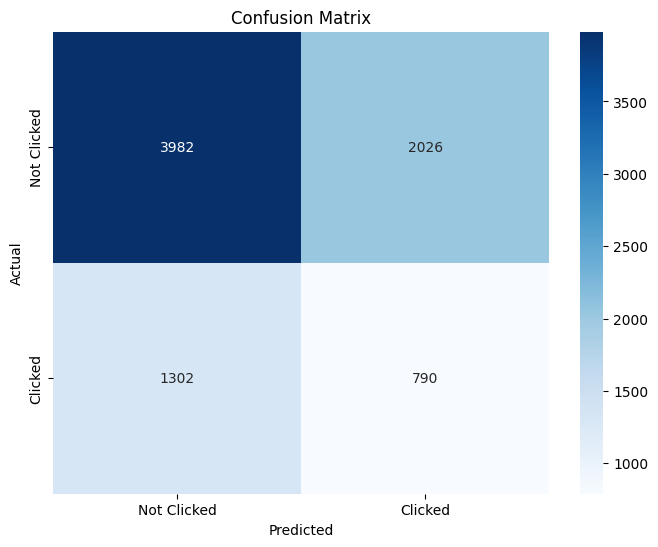

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


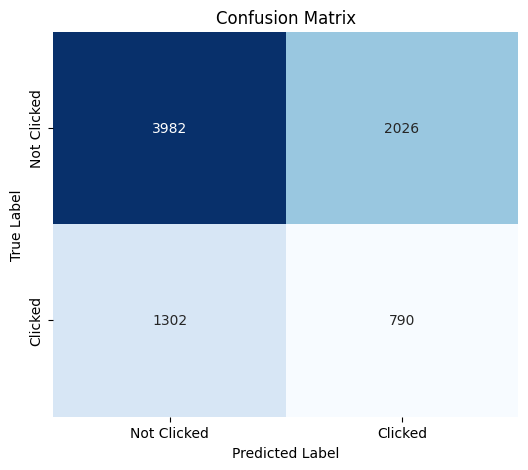

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap with simpler visuals
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


I think this model is not performing well. So some considerations should be taken to improve model performance


In [46]:
## LEts try DT model


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

In [47]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)


In [48]:
# Evaluate the model
print("Evaluation metrics for Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluation metrics for Decision Tree:
Accuracy: 0.5925
Precision: 0.2697
Recall: 0.3384
F1 Score: 0.3002
ROC AUC Score: 0.5097
Confusion Matrix:
[[4091 1917]
 [1384  708]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71      6008
         1.0       0.27      0.34      0.30      2092

    accuracy                           0.59      8100
   macro avg       0.51      0.51      0.51      8100
weighted avg       0.62      0.59      0.61      8100



## Random Forest

In [49]:

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [50]:
# Evaluate the model
print("Evaluation metrics for Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Evaluation metrics for Random Forest:
Accuracy: 0.6395
Precision: 0.2842
Recall: 0.2605
F1 Score: 0.2718
ROC AUC Score: 0.5160
Confusion Matrix:
[[4635 1373]
 [1547  545]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76      6008
         1.0       0.28      0.26      0.27      2092

    accuracy                           0.64      8100
   macro avg       0.52      0.52      0.52      8100
weighted avg       0.63      0.64      0.63      8100



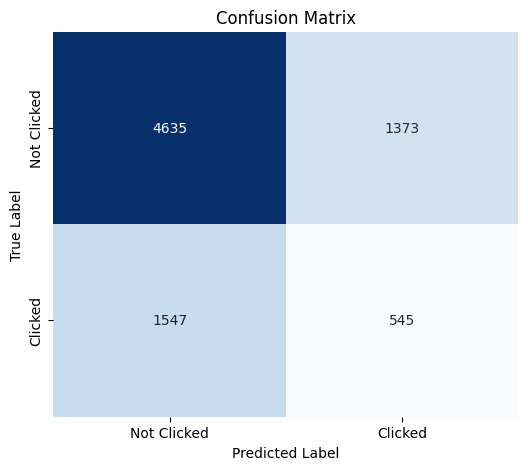

In [51]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()